<a href="https://colab.research.google.com/github/siddu1134/siddu/blob/main/ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Artistic Colorizer </font>**

#◢ Git clone and install DeOldify

In [2]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [3]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [4]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [5]:
!pip install -r requirements-colab.txt

In [6]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


In [37]:
import os

# Choose whether to use artistic or stable model
def colorize_media(input_path, render_factor=35, artistic=True, watermarked=True):
    ext = os.path.splitext(input_path)[-1].lower()

    if ext in ['.jpg', '.jpeg', '.png', '.bmp']:
        print(f"\n🎨 Colorizing image: {input_path}")
        colorizer = get_image_colorizer(artistic=artistic)
        colorizer.plot_transformed_image(
            path=input_path,
            render_factor=render_factor,
            display_render_factor=True,
            figsize=(8, 8),
            watermarked=watermarked
        )

    elif ext in ['.mp4', '.avi', '.mov', '.mkv']:
        print(f"\n🎞️  Colorizing video: {input_path}")
        colorizer = get_video_colorizer()
        colorizer.colorize_from_file_name(
            file_name=input_path,
            render_factor=render_factor,
            watermarked=watermarked
        )

    else:
        print(f"\n⚠️ Unsupported file type: {ext}")


In [38]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2025-08-08 14:12:54--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 156.146.43.72, 2400:52e0:1a02::1210:1
Connecting to data.deepai.org (data.deepai.org)|156.146.43.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.91MB/s    in 50s     

2025-08-08 14:13:43 (4.90 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [15]:
import torch

original_load = torch.load
def patched_load(*args, **kwargs):
    kwargs['weights_only'] = False  # force legacy behavior
    return original_load(*args, **kwargs)
torch.load = patched_load



from deoldify.visualize import *
colorizer = get_image_colorizer(artistic=True)


#◢ Colorize!!

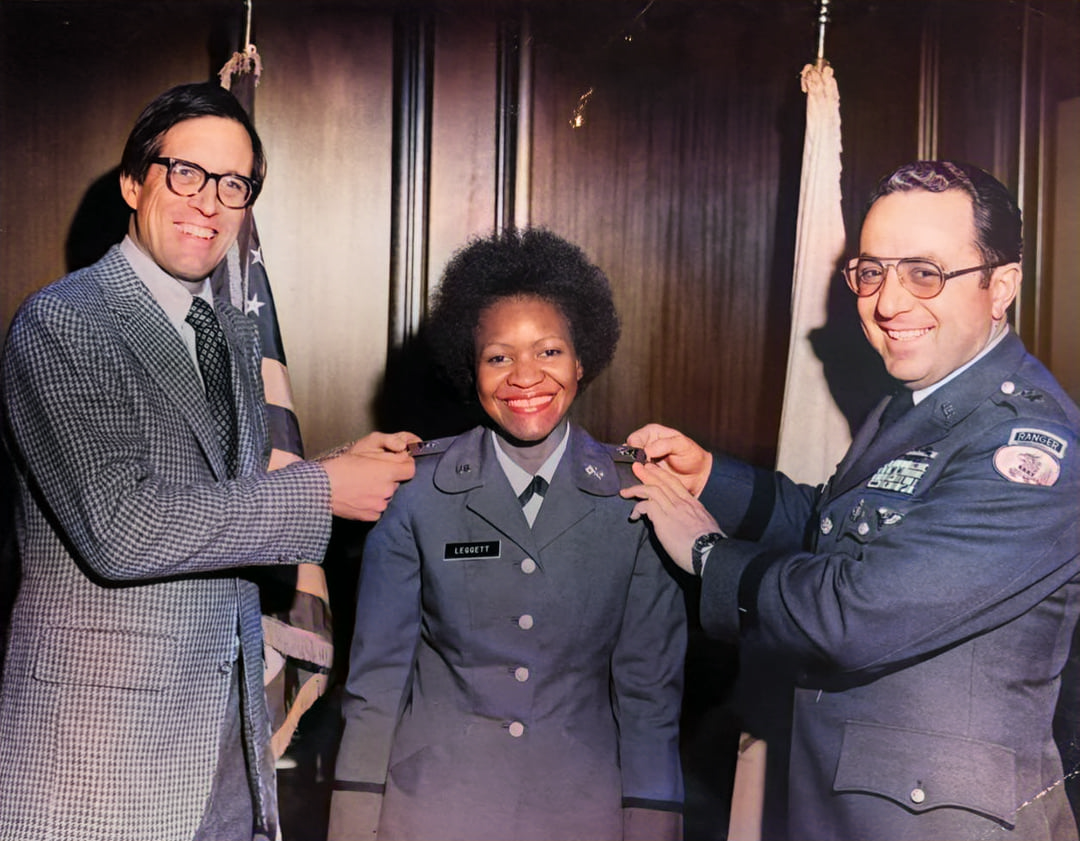

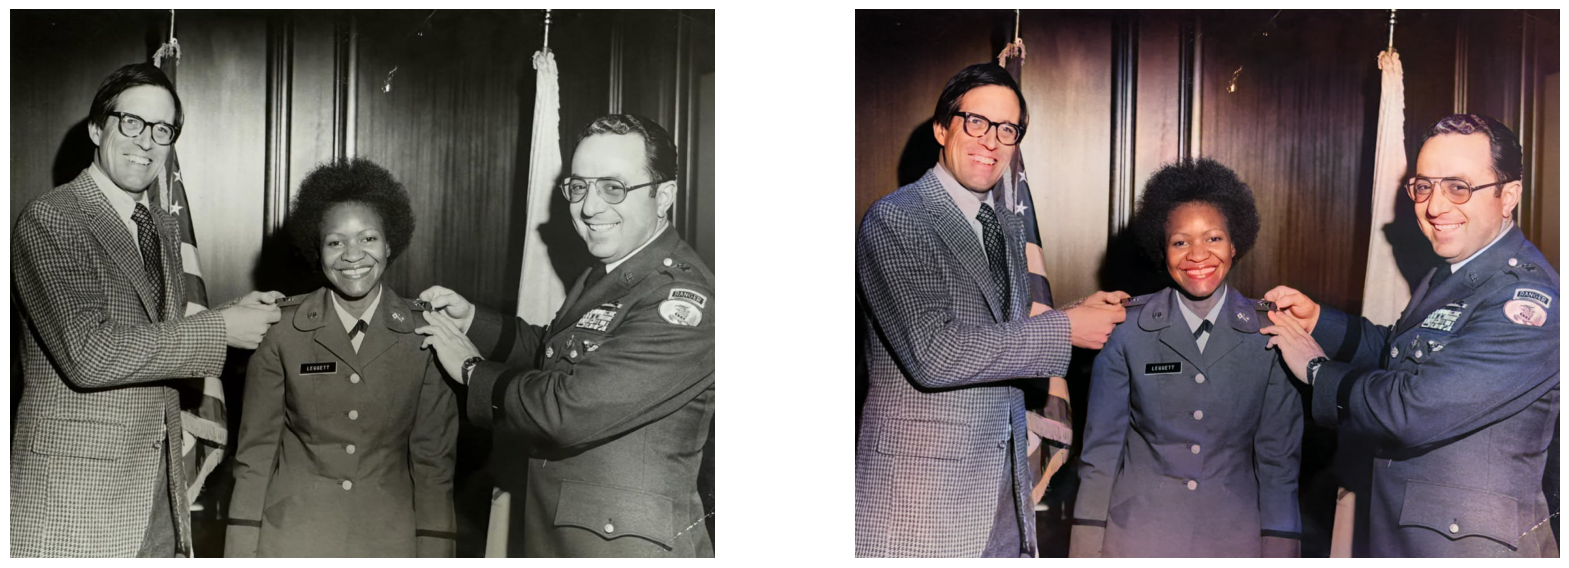

In [41]:
source_url = 'https://preview.redd.it/my-mom-linda-the-first-black-woman-to-complete-delawares-v0-nxwhvsvhn9df1.jpg?width=1080&crop=smart&auto=webp&s=5ffa2b85b05669ff3211e011d8124daac3e52723' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

In [ ]:
import matplotlib.pyplot as plt

for i in range(10, 40, 5):
    print(f"\n🎨 Render Factor: {i}")
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))


In [43]:
# If your image is named 'download.png'
colorize_media('/content/download.png', render_factor=35)

# If your video is named 'my_clip.mp4'
colorize_media('/content/my_clip.mp4', render_factor=21)



🎨 Colorizing image: /content/download.png


FileNotFoundError: [Errno 2] No such file or directory: '/content/download.png'